In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import re
%matplotlib inline

In [7]:
data = pd.read_csv(r'..\..\..\Week13\tableau-project\your-code\data\datasus.zip')

In [8]:
def trata_estado(estado):
    if estado in ['ES','MG','RJ','SP']:
        return 'SUDESTE'
    elif estado in ['PR','RS','SC']:
        return 'SUL'
    elif estado in ['AL','BA','CE','MA','PI','PE','PB','RN','SE']:
        return 'NORDESTE'
    elif estado in ['AC','AM','AP','PA','RO','RR','TO']:
        return 'NORTE'
    elif estado in ['GO','MT','MS','DF']:
        return 'CENTRO_OESTE'        

In [9]:
def trata_mes(mes):
    if mes == '01':
        return 'Janeiro'
    elif mes == '02':
        return 'Fevereiro'
    elif mes == '03':
        return 'Março'
    elif mes == '04':
        return 'Abril'
    elif mes == '05':
        return 'Maio'
    elif mes == '06':
        return 'Junho'
    elif mes == '07':
        return 'Julho'
    elif mes == '08':
        return 'Agosto'
    elif mes == '09':
        return 'Setembro'
    elif mes == '10':
        return 'Outubro'
    elif mes == '11':
        return 'Novembro'
    elif mes == '12':
        return 'Dezembro'

In [10]:
data['MES'] = data.DTOBITO.apply(lambda x: (str(x)[-6:-4]))
data.MES = data.MES.astype(float)

In [11]:
data['REGIAO'] = data.UF.apply(lambda x: trata_estado(x))

In [7]:
#data['MES'] = data.DTOBITO.apply(lambda x: trata_mes(str(x)[-6:-4]))

In [12]:
data.columns

Index(['Unnamed: 0', 'CAUSABAS', 'DTOBITO', 'CAUSABAS_O', 'NOMMUN',
       'NMRACACOR', 'NMESTCIV', 'NMSEXO', 'IDADE', 'POSICAO', 'NOME', 'IDHM',
       'UF', 'CODCID', 'NMCID', 'MES', 'REGIAO'],
      dtype='object')

In [13]:
data.drop(['Unnamed: 0','NOME','CAUSABAS','CAUSABAS_O', 'POSICAO','DTOBITO', 'NMCID','UF','NOMMUN'],axis=1,inplace=True)

In [14]:
data.CODCID = data.CODCID.apply(lambda x: ''.join(re.findall('[\d]',x)))

In [57]:
data.CODCID = data.CODCID.astype(int)

In [63]:
data.dtypes

NMRACACOR     object
NMESTCIV      object
NMSEXO        object
IDADE        float64
IDHM         float64
CODCID         int32
MES          float64
REGIAO        object
dtype: object

In [64]:
data.dtypes

NMRACACOR     object
NMESTCIV      object
NMSEXO        object
IDADE        float64
IDHM         float64
CODCID         int32
MES          float64
REGIAO        object
dtype: object

In [65]:
data.loc[data.IDADE.isnull(), 'IDADE'] = -1

In [66]:
data.loc[data.NMSEXO.isnull(), 'NMSEXO'] = 'INDEFINIDO'

In [67]:
data.loc[data.NMRACACOR.isnull(), 'NMRACACOR'] = 'INDEFINIDO'

In [68]:
data.NMESTCIV = data.NMESTCIV.apply(lambda x : 'INDEFINIDO' if x != x else x)

In [69]:
data.isnull().sum()

NMRACACOR    0
NMESTCIV     0
NMSEXO       0
IDADE        0
IDHM         0
CODCID       0
MES          0
REGIAO       0
dtype: int64

In [70]:
data_ml = data.copy()

In [71]:
data_ml = pd.get_dummies(data, columns=['NMSEXO', 'NMRACACOR','NMESTCIV','REGIAO'])

In [72]:
data_ml.dtypes

IDADE                        float64
IDHM                         float64
CODCID                         int32
MES                          float64
NMSEXO_FEMININO                uint8
NMSEXO_INDEFINIDO              uint8
NMSEXO_MASCULINO               uint8
NMRACACOR_BRANCA               uint8
NMRACACOR_INDEFINIDO           uint8
NMRACACOR_INDIGENA             uint8
NMRACACOR_PARDA                uint8
NMRACACOR_PRETA                uint8
NMESTCIV_CASADO                uint8
NMESTCIV_INDEFINIDO            uint8
NMESTCIV_SEPARADO              uint8
NMESTCIV_SOLTEIRO              uint8
NMESTCIV_UNIAO CONSENSUAL      uint8
NMESTCIV_VIUVO                 uint8
REGIAO_CENTRO_OESTE            uint8
REGIAO_NORDESTE                uint8
REGIAO_NORTE                   uint8
REGIAO_SUDESTE                 uint8
REGIAO_SUL                     uint8
dtype: object

In [73]:
data_ml.columns

Index(['IDADE', 'IDHM', 'CODCID', 'MES', 'NMSEXO_FEMININO',
       'NMSEXO_INDEFINIDO', 'NMSEXO_MASCULINO', 'NMRACACOR_BRANCA',
       'NMRACACOR_INDEFINIDO', 'NMRACACOR_INDIGENA', 'NMRACACOR_PARDA',
       'NMRACACOR_PRETA', 'NMESTCIV_CASADO', 'NMESTCIV_INDEFINIDO',
       'NMESTCIV_SEPARADO', 'NMESTCIV_SOLTEIRO', 'NMESTCIV_UNIAO CONSENSUAL',
       'NMESTCIV_VIUVO', 'REGIAO_CENTRO_OESTE', 'REGIAO_NORDESTE',
       'REGIAO_NORTE', 'REGIAO_SUDESTE', 'REGIAO_SUL'],
      dtype='object')

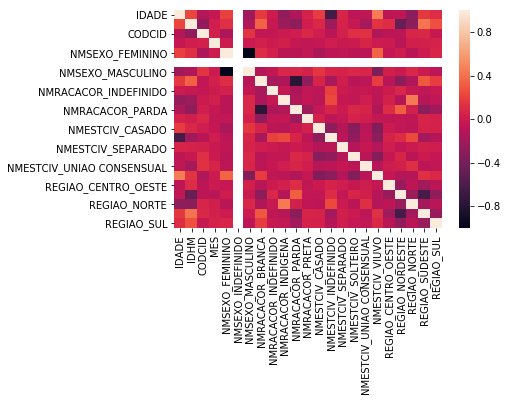

In [74]:
sns.heatmap(data_ml.head(1000).corr())

In [75]:
data_bin = data_ml.head(10000)

* usar pca
* 80 e 20

Árvore de decisão

In [76]:
data_bin = data_bin.dropna()

In [77]:
data_bin

IDADE   IDHM  CODCID  MES  NMSEXO_FEMININO  NMSEXO_INDEFINIDO  \
0      20.0  0.532      58  9.0                0                  0   
1      38.0  0.805      58  1.0                1                  0   
2      29.0  0.805      58  5.0                0                  0   
3      77.0  0.805      58  4.0                1                  0   
4      60.0  0.805      58  2.0                0                  0   
...     ...    ...     ...  ...              ...                ...   
9995   57.0  0.717     149  5.0                1                  0   
9996   85.0  0.717     149  5.0                0                  0   
9997   80.0  0.717     149  1.0                1                  0   
9998  111.0  0.717     149  1.0                1                  0   
9999   82.0  0.717     149  5.0                1                  0   

      NMSEXO_MASCULINO  NMRACACOR_BRANCA  NMRACACOR_INDEFINIDO  \
0                    1                 0                     0   
1                    0                 1                     0   
2                    1                 1                     0   
3                    0                 1                     0   
4                    1                 1                     0   
...                ...               ...                   ...   
9995                 0                 0                     0   
9996                 1                 0                     0   
9997                 0                 0                     0   
9998                 0                 1                     0   
9999                 0                 1                     0   

      NMRACACOR_INDIGENA  ...  NMESTCIV_INDEFINIDO  NMESTCIV_SEPARADO  \
0                      1  ...                    1                  0   
1                      0  ...                    0                  0   
2                      0  ...                    0                  0   
3                      0  ...                    0                  0   
4                      0  ...                    0                  0   
...                  ...  ...                  ...                ...   
9995                   0  ...                    0                  0   
9996                   0  ...                    0                  0   
9997                   0  ...                    0                  0   
9998                   0  ...                    0                  0   
9999                   0  ...                    0                  0   

      NMESTCIV_SOLTEIRO  NMESTCIV_UNIAO CONSENSUAL  NMESTCIV_VIUVO  \
0                     0                          0               0   
1                     1                          0               0   
2                     0                          0               0   
3                     0                          0               0   
4                     0                          0               0   
...                 ...                        ...             ...   
9995                  0                          0               1   
9996                  0                          0               1   
9997                  0                          0               1   
9998                  0                          0               1   
9999                  0                          0               1   

      REGIAO_CENTRO_OESTE  REGIAO_NORDESTE  REGIAO_NORTE  REGIAO_SUDESTE  \
0                       0                0             1               0   
1                       0                0             0               1   
2                       0                0             0               1   
3                       0                0             0               1   
4                       0                0             0               1   
...                   ...              ...           ...             ...   
9995                    0                1             0               0   
9996                    0         

In [78]:
data_bin.CODCID.unique()

array([ 58,   9, 440, 149], dtype=int64)

In [79]:
[col for col in data_bin.columns if col not in ['IDADE_Q','IDADE']]

['IDHM',
 'CODCID',
 'MES',
 'NMSEXO_FEMININO',
 'NMSEXO_INDEFINIDO',
 'NMSEXO_MASCULINO',
 'NMRACACOR_BRANCA',
 'NMRACACOR_INDEFINIDO',
 'NMRACACOR_INDIGENA',
 'NMRACACOR_PARDA',
 'NMRACACOR_PRETA',
 'NMESTCIV_CASADO',
 'NMESTCIV_INDEFINIDO',
 'NMESTCIV_SEPARADO',
 'NMESTCIV_SOLTEIRO',
 'NMESTCIV_UNIAO CONSENSUAL',
 'NMESTCIV_VIUVO',
 'REGIAO_CENTRO_OESTE',
 'REGIAO_NORDESTE',
 'REGIAO_NORTE',
 'REGIAO_SUDESTE',
 'REGIAO_SUL']

In [80]:
data_bin['IDADE_Q'] = pd.qcut(data_bin['IDADE'],q=4,labels=['Infantil','Leite com Pêra','Meia-idade','Pé na Cova'])

In [81]:
data_bin.columns

Index(['IDADE', 'IDHM', 'CODCID', 'MES', 'NMSEXO_FEMININO',
       'NMSEXO_INDEFINIDO', 'NMSEXO_MASCULINO', 'NMRACACOR_BRANCA',
       'NMRACACOR_INDEFINIDO', 'NMRACACOR_INDIGENA', 'NMRACACOR_PARDA',
       'NMRACACOR_PRETA', 'NMESTCIV_CASADO', 'NMESTCIV_INDEFINIDO',
       'NMESTCIV_SEPARADO', 'NMESTCIV_SOLTEIRO', 'NMESTCIV_UNIAO CONSENSUAL',
       'NMESTCIV_VIUVO', 'REGIAO_CENTRO_OESTE', 'REGIAO_NORDESTE',
       'REGIAO_NORTE', 'REGIAO_SUDESTE', 'REGIAO_SUL', 'IDADE_Q'],
      dtype='object')

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data_bin[['IDHM', 'CODCID', 'MES', 'NMSEXO_FEMININO', 'NMSEXO_MASCULINO',
                                                   'NMRACACOR_BRANCA','NMRACACOR_PARDA','NMESTCIV_CASADO', 'NMESTCIV_SEPARADO',
                                                   'NMESTCIV_SOLTEIRO', 'NMESTCIV_VIUVO','REGIAO_NORDESTE','REGIAO_SUDESTE']], 
                                                    data_bin['IDADE_Q'],
                                                    test_size=0.2)

In [83]:
tree = DecisionTreeClassifier(min_samples_leaf=10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
y_pred = tree.predict(X_test)
y_pred

array(['Meia-idade', 'Leite com Pêra', 'Pé na Cova', ..., 'Meia-idade',
       'Leite com Pêra', 'Leite com Pêra'], dtype=object)

In [85]:
sorted(list(zip(X_train.columns, tree.feature_importances_)), key=lambda x : x[1], reverse=True)

[('NMESTCIV_VIUVO', 0.24468118182213308),
 ('IDHM', 0.22789749522688874),
 ('MES', 0.18342776412826892),
 ('CODCID', 0.09566283715795487),
 ('NMESTCIV_CASADO', 0.07273450673214),
 ('NMESTCIV_SOLTEIRO', 0.031058631881806138),
 ('NMRACACOR_BRANCA', 0.030234606842889776),
 ('REGIAO_SUDESTE', 0.024590633600552286),
 ('NMSEXO_MASCULINO', 0.022732896212509523),
 ('NMESTCIV_SEPARADO', 0.021249928670653426),
 ('NMRACACOR_PARDA', 0.015968868062586985),
 ('REGIAO_NORDESTE', 0.01547283967931657),
 ('NMSEXO_FEMININO', 0.014287809982299596)]

In [86]:
from sklearn import tree as tr

In [87]:
print(tr.export_graphviz(tree, filled=True, rounded=True, special_characters=False, impurity=False, feature_names=X_train.columns) ) 

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="NMESTCIV_VIUVO <= 0.5\nsamples = 8000\nvalue = [2025, 2011, 2182, 1782]", fillcolor="#399de507"] ;
1 [label="NMESTCIV_CASADO <= 0.5\nsamples = 5626\nvalue = [1934, 1570, 1355, 767]", fillcolor="#e5813917"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="CODCID <= 103.5\nsamples = 3236\nvalue = [1412, 734, 649, 441]", fillcolor="#e5813945"] ;
1 -> 2 ;
3 [label="NMESTCIV_SOLTEIRO <= 0.5\nsamples = 1477\nvalue = [834, 204, 240, 199]", fillcolor="#e581397a"] ;
2 -> 3 ;
4 [label="NMESTCIV_SEPARADO <= 0.5\nsamples = 800\nvalue = [528, 79, 112, 81]", fillcolor="#e581399a"] ;
3 -> 4 ;
5 [label="REGIAO_NORDESTE <= 0.5\nsamples = 695\nvalue = [495, 51, 79, 70]", fillcolor="#e58139ac"] ;
4 -> 5 ;
6 [label="REGIAO_SUDESTE <= 0.5\nsamples = 375\nvalue = [293, 22, 31, 29]", fillcolor="#e58139c2"] ;
5 -> 6 ;
7 [label="IDHM <= 0.49\nsamples = 234

In [88]:
confusion_matrix = cm(y_test, y_pred, )
confusion_matrix

array([[279, 111,  80,  20],
       [148, 162, 127,  80],
       [126, 152, 136, 116],
       [ 79,  78, 133, 173]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred));

                precision    recall  f1-score   support

      Infantil       0.44      0.57      0.50       490
Leite com Pêra       0.32      0.31      0.32       517
    Meia-idade       0.29      0.26      0.27       530
    Pé na Cova       0.44      0.37      0.41       463

     micro avg       0.38      0.38      0.38      2000
     macro avg       0.37      0.38      0.37      2000
  weighted avg       0.37      0.38      0.37      2000



******Regressão Logística********

In [90]:
X_train.columns

Index(['IDHM', 'CODCID', 'MES', 'NMSEXO_FEMININO', 'NMSEXO_MASCULINO',
       'NMRACACOR_BRANCA', 'NMRACACOR_PARDA', 'NMESTCIV_CASADO',
       'NMESTCIV_SEPARADO', 'NMESTCIV_SOLTEIRO', 'NMESTCIV_VIUVO',
       'REGIAO_NORDESTE', 'REGIAO_SUDESTE'],
      dtype='object')

In [91]:
logres.coef_

array([[ 1.63188535e-01, -1.14315951e-03,  8.08229387e-03,
         4.74534489e-02,  2.09394163e-01, -1.82651717e-01,
         8.51287189e-02, -3.07046187e-01,  9.39235795e-02,
         3.66983306e-01, -1.27002199e+00, -2.81727985e-01,
        -6.31016938e-02],
       [-5.04236883e-03,  2.01191366e-03, -8.86701907e-03,
         1.02665585e-02, -9.81692536e-02, -9.85577476e-02,
         4.59581316e-02,  3.80230841e-01,  1.30873576e-01,
         4.70824446e-02, -1.40720946e-01,  1.40180381e-03,
         2.97015852e-02],
       [-6.68441013e-02,  3.60114747e-04,  1.08811911e-02,
        -1.45570413e-02, -7.04923826e-02,  1.18548422e-01,
         3.88983581e-02,  2.02558880e-01,  4.90431642e-03,
        -2.25822014e-01,  4.62635093e-01,  1.18449497e-01,
        -2.90364840e-03],
       [-9.13020648e-02, -1.22886890e-03, -1.00964659e-02,
        -4.31629660e-02, -4.07325269e-02,  1.62661042e-01,
        -1.69985209e-01, -2.75743534e-01, -2.29701472e-01,
        -1.88243737e-01,  9.48107841e

In [92]:
logres = LogisticRegression(solver='lbfgs',multi_class='auto')
logres.fit(X_train, y_train)

C:\Users\lenon\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
pred_logres = logres.predict(X_test)
print(pred_logres)

['Pé na Cova' 'Leite com Pêra' 'Infantil' ... 'Pé na Cova'
 'Leite com Pêra' 'Infantil']


In [94]:
pred_logres == y_pred

array([False,  True, False, ..., False,  True, False])

In [95]:
print(classification_report(y_test, pred_logres))
print('******************************************************')
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Infantil       0.42      0.62      0.50       490
Leite com Pêra       0.35      0.42      0.38       517
    Meia-idade       0.37      0.13      0.19       530
    Pé na Cova       0.48      0.49      0.49       463

     micro avg       0.41      0.41      0.41      2000
     macro avg       0.41      0.41      0.39      2000
  weighted avg       0.40      0.41      0.38      2000

******************************************************
                precision    recall  f1-score   support

      Infantil       0.44      0.57      0.50       490
Leite com Pêra       0.32      0.31      0.32       517
    Meia-idade       0.29      0.26      0.27       530
    Pé na Cova       0.44      0.37      0.41       463

     micro avg       0.38      0.38      0.38      2000
     macro avg       0.37      0.38      0.37      2000
  weighted avg       0.37      0.38      0.37      2000



In [96]:
import xgboost

In [97]:
model = xgboost.XGBClassifier(n_estimators=500, n_jobs=-1).fit(X_train, y_train)

In [98]:
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import roc_auc_score

In [103]:
print(classification_report(y_test, model.predict(X_test)))

                precision    recall  f1-score   support

      Infantil       0.49      0.57      0.52       490
Leite com Pêra       0.36      0.40      0.38       517
    Meia-idade       0.36      0.32      0.34       530
    Pé na Cova       0.52      0.44      0.48       463

     micro avg       0.43      0.43      0.43      2000
     macro avg       0.43      0.43      0.43      2000
  weighted avg       0.43      0.43      0.43      2000



In [102]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

ValueError: multiclass format is not supported